In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Распаковка и анализ наборов данных

In [183]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

In [184]:
train.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [185]:
train.describe()

,id,label
count,80000.000000,80000.000000
mean,50107.893162,0.277250
std,28857.649778,0.447644
min,0.000000,0.000000
25%,25122.500000,0.000000
50%,50146.500000,0.000000
75%,75064.250000,1.000000
max,99999.000000,1.000000


In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [187]:
test.head()

,id,dates,values
0,6125,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.85, -0.04, 0.19, -0.45, -0.75, -0.95, -2.91..."
1,26781,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.41, 0.39, -0.47, -0.9, -1.46, -0.51, 0.51,..."
2,13333,"[2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0...","[-0.29, -1.26, 0.17, -1.22, 0.45, -0.94, 0.16,..."
3,53218,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.47, 1.55, -0.03, 0.57, -0.57, 0.6, 0.27, 1..."
4,84204,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.33, 1.39, -1.03, -2.64, 1.89, 1.77, 1.43, 1..."


In [188]:
test.describe()

,id
count,20000.000000
mean,49565.927350
std,28904.312706
min,2.000000
25%,24497.250000
50%,49399.000000
75%,74769.250000
max,99985.000000


In [189]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   dates   20000 non-null  object
 2   values  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


# Анализ предоставленных данных (EDA)

In [190]:
label_1 = train[train['label'] == 1]
label_0 = train[train['label'] == 0]

print ("label_1: %i (%.1f%%)"%(len(label_1), (len(label_1))/len(train)*100.0))
print ("label_0: %i (%.1f%%)"%(len(label_0), (len(label_0))/len(train)*100.0))
print ("Total: %i"%len(train))

label_1: 22180 (27.7%)
label_0: 57820 (72.3%)
Total: 80000


## Поиск и визуализация признаков

### Разбор Values

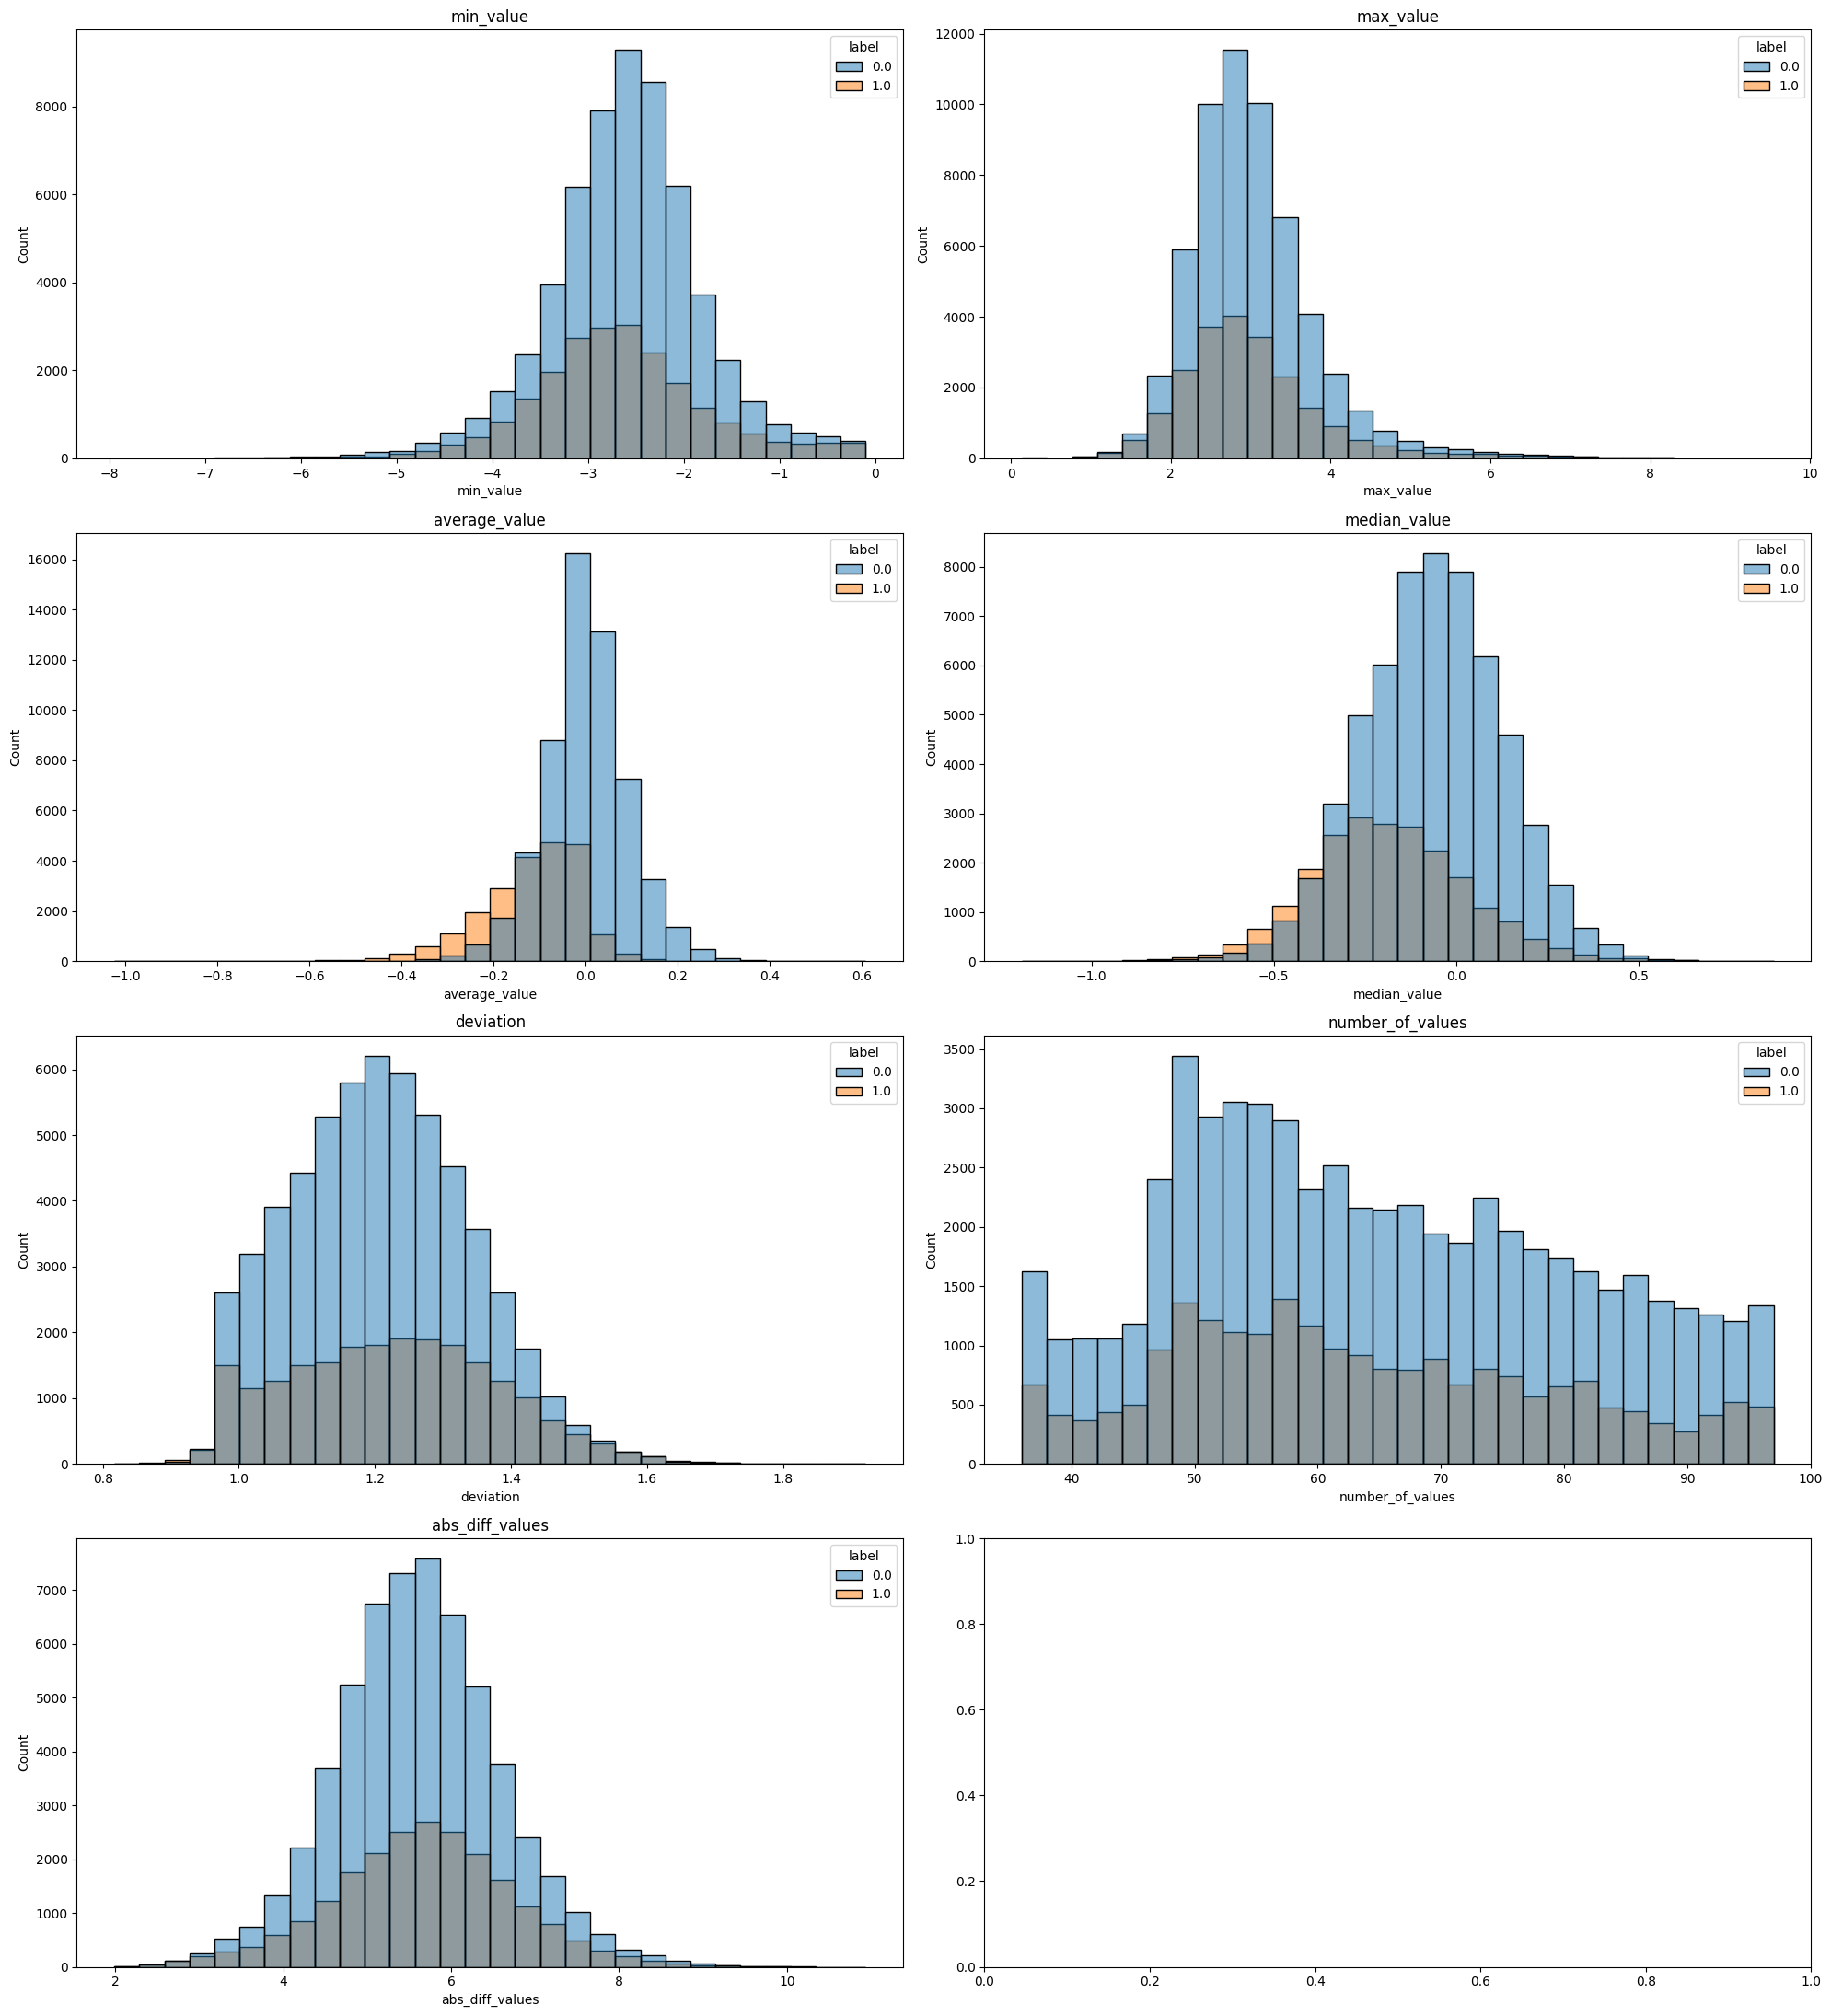

In [191]:
train['min_value'] = train['values'].apply(lambda x: np.min(x))
train['max_value'] = train['values'].apply(lambda x: np.max(x))
train['average_value'] = train['values'].apply(lambda x: np.mean(x))
train['median_value'] = train['values'].apply(lambda x: np.median(x))
train['deviation'] = train['values'].apply(lambda x: np.std(x))
train['number_of_values'] = train['values'].apply(lambda x: len(x))
train['abs_diff_values'] = train['values'].apply(lambda x: abs(np.max(x) - np.min(x)))

fig, axes = plt.subplots(4, 2, figsize=(20, 22))

sns.histplot(data=train, x='min_value', hue='label', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('min_value')

sns.histplot(data=train, x='max_value', hue='label', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('max_value')

sns.histplot(data=train, x='average_value', hue='label', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('average_value')

sns.histplot(data=train, x='median_value', hue='label', bins=30, ax=axes[1, 1])
axes[1, 1].set_title('median_value')

sns.histplot(data=train, x='deviation', hue='label', bins=30, ax=axes[2, 0])
axes[2, 0].set_title('deviation')

sns.histplot(data=train, x='number_of_values', hue='label', bins=30, ax=axes[2, 1])
axes[2, 1].set_title('number_of_values')

sns.histplot(data=train, x='abs_diff_values', hue='label', bins=30, ax=axes[3, 0])
axes[3, 0].set_title('abs_diff_values')

plt.tight_layout()
plt.show()

### Разбор Dates

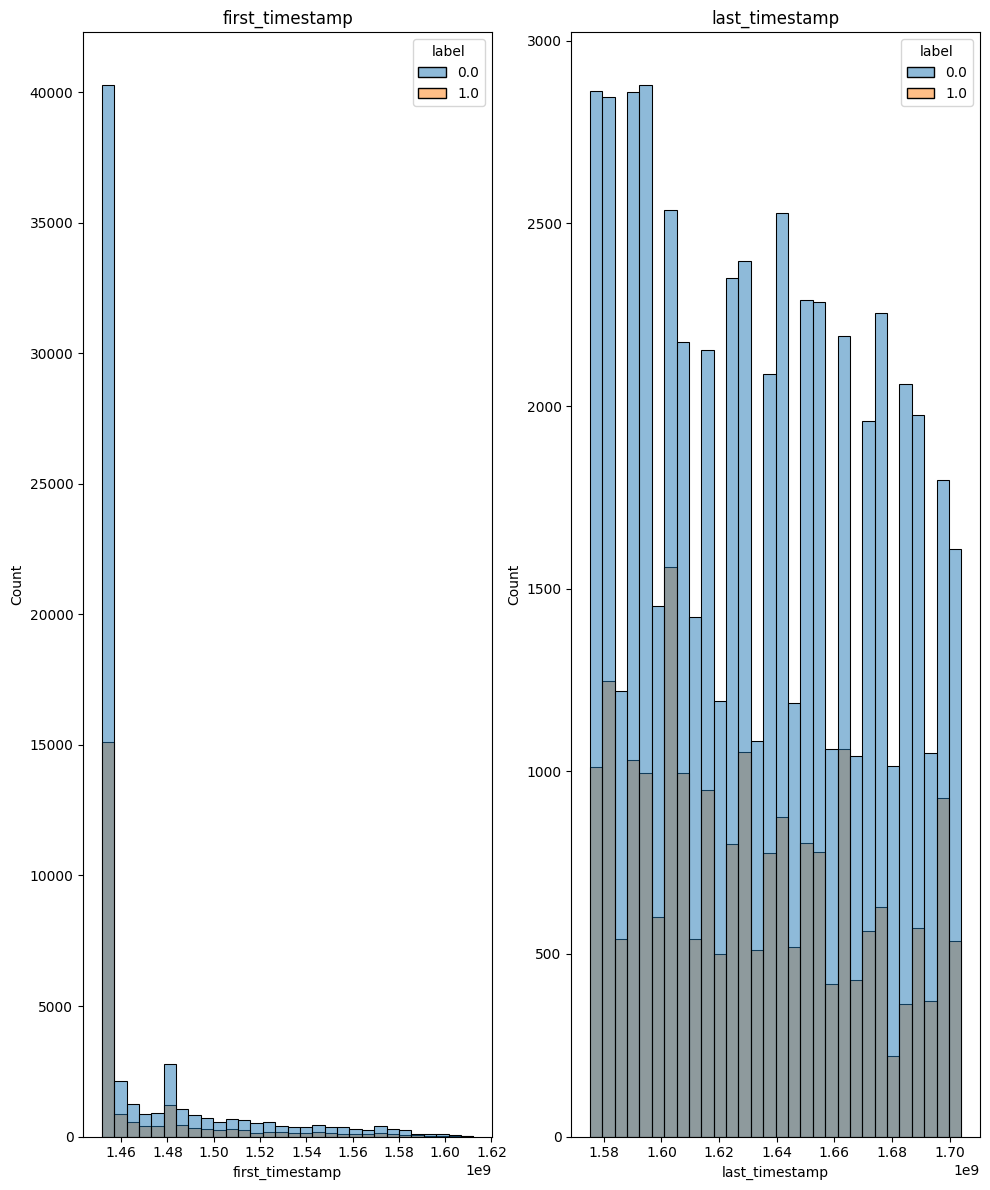

In [192]:
train['first_date'] = train['dates'].apply(lambda x: x[0])
train['last_date'] = train['dates'].apply(lambda x: x[len(x)-1])

train['first_date'] = pd.to_datetime(train['first_date'])
train['last_date'] = pd.to_datetime(train['last_date'])

train['first_timestamp'] = train['first_date'].astype(int) / 10**9
train['last_timestamp'] = train['last_date'].astype(int) / 10**9

train.drop('first_date', axis=1, inplace=True)
train.drop('last_date', axis=1, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 12))

sns.histplot(data=train, x='first_timestamp', hue='label', bins=30, ax=axes[0])
axes[0].set_title('first_timestamp')

sns.histplot(data=train, x='last_timestamp', hue='label', bins=30, ax=axes[1])
axes[1].set_title('last_timestamp')

plt.tight_layout()
plt.show()

## Строим таблицу корреляции

<Axes: >

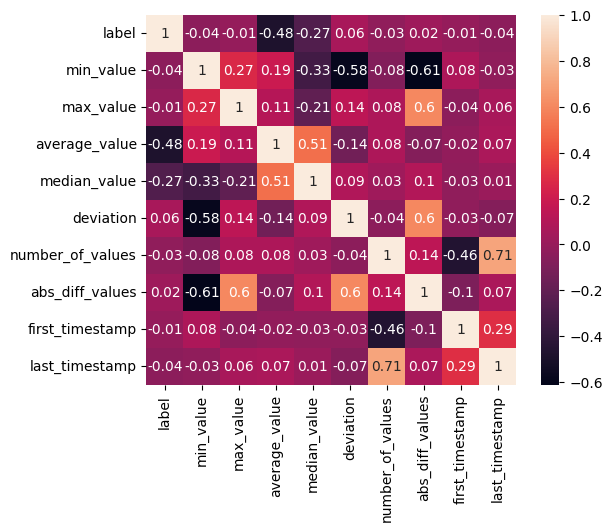

In [193]:
train_filtered = train.drop(columns=['id', 'dates', 'values'])
sns.heatmap(data=train_filtered.corr().round(2), square=True, annot=True)

# Предобработка данных

## Подготовка датафреймов, удаление ненужных столбиков, разбиение на признаки

In [194]:
train_test_data = [train, test]

In [195]:
for dataset in train_test_data:
  dataset['first_date'] = dataset['dates'].apply(lambda x: x[0])
  dataset['last_date'] = dataset['dates'].apply(lambda x: x[len(x)-1])
  dataset['min_value'] = dataset['values'].apply(lambda x: min(x))
  dataset['max_value'] = dataset['values'].apply(lambda x: max(x))
  dataset['average_value'] = dataset['values'].apply(lambda x: np.mean(x))
  dataset['median_value'] = dataset['values'].apply(lambda x: np.median(x))
  dataset['deviation'] = dataset['values'].apply(lambda x: np.std(x))
  dataset['number_of_values'] = dataset['values'].apply(lambda x: len(x))
  dataset['abs_diff_values'] = dataset['values'].apply(lambda x: abs(np.max(x) - np.min(x)))

  dataset.drop('dates', axis=1, inplace=True)
  dataset.drop('values', axis=1, inplace=True)

In [196]:
for dataset in train_test_data:
  dataset['first_date'] = pd.to_datetime(dataset['first_date'])
  dataset['last_date'] = pd.to_datetime(dataset['last_date'])

  dataset['first_timestamp'] = dataset['first_date'].astype(int) / 10**9
  dataset['last_timestamp'] = dataset['last_date'].astype(int) / 10**9

  dataset.drop('first_date', axis=1, inplace=True)
  dataset.drop('last_date', axis=1, inplace=True)

In [197]:
train.head()

,id,label,min_value,max_value,average_value,median_value,deviation,number_of_values,abs_diff_values,first_timestamp,last_timestamp
0,19114,0.0,-4.840000,3.49,0.023710,-0.110000,1.337272,62,8.330000,1.451606e+09,1.612138e+09
1,22769,1.0,-3.534409,2.92,-0.310777,-0.274409,1.556337,45,6.454409,1.462061e+09,1.577837e+09
2,76935,0.0,-1.950000,2.61,-0.046042,-0.145000,1.065023,48,4.560000,1.488326e+09,1.612138e+09
3,66297,0.0,-2.220000,2.49,-0.130000,-0.345000,1.158201,48,4.710000,1.451606e+09,1.575158e+09
4,2191,0.0,-2.500000,2.87,-0.270536,-0.475000,1.270529,56,5.370000,1.451606e+09,1.596240e+09


In [198]:
test.head()

,id,min_value,max_value,average_value,median_value,deviation,number_of_values,abs_diff_values,first_timestamp,last_timestamp
0,6125,-3.14,3.13,0.037895,-0.01,1.505985,57,6.27,1.451606e+09,1.598918e+09
1,26781,-2.24,3.85,-0.016909,-0.08,1.249663,55,6.09,1.451606e+09,1.593562e+09
2,13333,-1.45,3.46,-0.039569,-0.16,1.000514,55,4.91,1.464739e+09,1.606781e+09
3,53218,-2.73,3.43,0.159231,0.11,1.313112,78,6.16,1.451606e+09,1.654042e+09
4,84204,-2.66,2.57,-0.094705,-0.09,1.243279,65,5.23,1.451606e+09,1.619827e+09


## Проверяем на наличие Nan и заполняем данные

In [199]:
train.isna().sum()

,0
id,0
label,0
min_value,88
max_value,88
average_value,88
median_value,88
deviation,88
number_of_values,0
abs_diff_values,88
first_timestamp,0


In [200]:
test.isna().sum()

,0
id,0
min_value,21
max_value,21
average_value,21
median_value,21
deviation,21
number_of_values,0
abs_diff_values,21
first_timestamp,0
last_timestamp,0


In [201]:
for dataset in train_test_data:
  dataset['min_value'] = dataset['min_value'].fillna(dataset['min_value'].mean())
  dataset['max_value'] = dataset['max_value'].fillna(dataset['max_value'].mean())
  dataset['average_value'] = dataset['average_value'].fillna(dataset['average_value'].mean())
  dataset['median_value'] = dataset['median_value'].fillna(dataset['median_value'].mean())
  dataset['deviation'] = dataset['deviation'].fillna(dataset['deviation'].mean())
  dataset['abs_diff_values'] = dataset['abs_diff_values'].fillna(dataset['abs_diff_values'].mean())

In [202]:
train.isna().sum()

,0
id,0
label,0
min_value,0
max_value,0
average_value,0
median_value,0
deviation,0
number_of_values,0
abs_diff_values,0
first_timestamp,0


In [203]:
test.isna().sum()

,0
id,0
min_value,0
max_value,0
average_value,0
median_value,0
deviation,0
number_of_values,0
abs_diff_values,0
first_timestamp,0
last_timestamp,0


# Feature Importance

In [204]:
from statsmodels.tsa.stattools import adfuller
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [205]:
Xtrain = train.drop('label', axis=1).values
ytrain = train['label'].values

## XGBoost Model

In [206]:
xgb_model = XGBClassifier()
xgb_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [207]:
yhat_train_xgb = xgb_model.predict(Xtrain)
yhat_train_proba_xgb = xgb_model.predict_proba(Xtrain)
yhat_train_proba_xgb

array([[0.95077604, 0.04922397],
       [0.03159332, 0.9684067 ],
       [0.8270258 , 0.17297423],
       ...,
       [0.44822413, 0.5517759 ],
       [0.50530964, 0.49469036],
       [0.08477241, 0.9152276 ]], dtype=float32)

In [208]:
roc_auc_xgb = roc_auc_score(ytrain, yhat_train_proba_xgb[:, 1])
print(roc_auc_xgb)

0.8872105063006084


## Logistic Regression Model

In [209]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

In [210]:
yhat_train_lr = lr_model.predict(Xtrain)
yhat_train_proba_lr = lr_model.predict_proba(Xtrain)
yhat_train_proba_lr

array([[0.71938407, 0.28061593],
       [0.70338792, 0.29661208],
       [0.70888667, 0.29111333],
       ...,
       [0.70892164, 0.29107836],
       [0.72052401, 0.27947599],
       [0.708413  , 0.291587  ]])

In [211]:
roc_auc_lr = roc_auc_score(ytrain, yhat_train_proba_lr[:, 1])
print(roc_auc_lr)

0.5213933598534553


## Random Forest Model

In [212]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=0)
rf_model.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=5, random_state=0)

In [213]:
yhat_train_rf = rf_model.predict(Xtrain)
yhat_train_proba_rf = rf_model.predict_proba(Xtrain)
yhat_train_proba_rf

array([[0.86392014, 0.13607986],
       [0.22203865, 0.77796135],
       [0.80507447, 0.19492553],
       ...,
       [0.49233458, 0.50766542],
       [0.63865566, 0.36134434],
       [0.3820355 , 0.6179645 ]])

In [214]:
roc_auc_rf = roc_auc_score(ytrain, yhat_train_proba_rf[:, 1])
print(roc_auc_rf)

0.8212243186388277


## k-Nearest Neighbors Model

In [215]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=25)

In [216]:
yhat_train_knn = knn_model.predict(Xtrain)
yhat_train_proba_knn = knn_model.predict_proba(Xtrain)
yhat_train_proba_knn

array([[0.8 , 0.2 ],
       [0.64, 0.36],
       [0.72, 0.28],
       ...,
       [0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32]])

In [217]:
roc_auc_knn = roc_auc_score(ytrain, yhat_train_proba_knn[:, 1])
print(roc_auc_knn)

0.6445335002381385


## Catboost Model

In [218]:
cb_model = CatBoostClassifier(verbose=False)
cb_model.fit(Xtrain, ytrain)

In [219]:
yhat_train_cb = cb_model.predict(Xtrain)
yhat_train_proba_cb = cb_model.predict_proba(Xtrain)
yhat_train_proba_cb

array([[0.9292368 , 0.0707632 ],
       [0.0904742 , 0.9095258 ],
       [0.81073376, 0.18926624],
       ...,
       [0.51807381, 0.48192619],
       [0.54346663, 0.45653337],
       [0.15162886, 0.84837114]])

In [220]:
roc_auc_cb = roc_auc_score(ytrain, yhat_train_proba_cb[:, 1])
print(roc_auc_cb)

0.8752886613067075


## Сравнение Roc Auc моделей и важности признаков

<Figure size 1000x600 with 0 Axes>

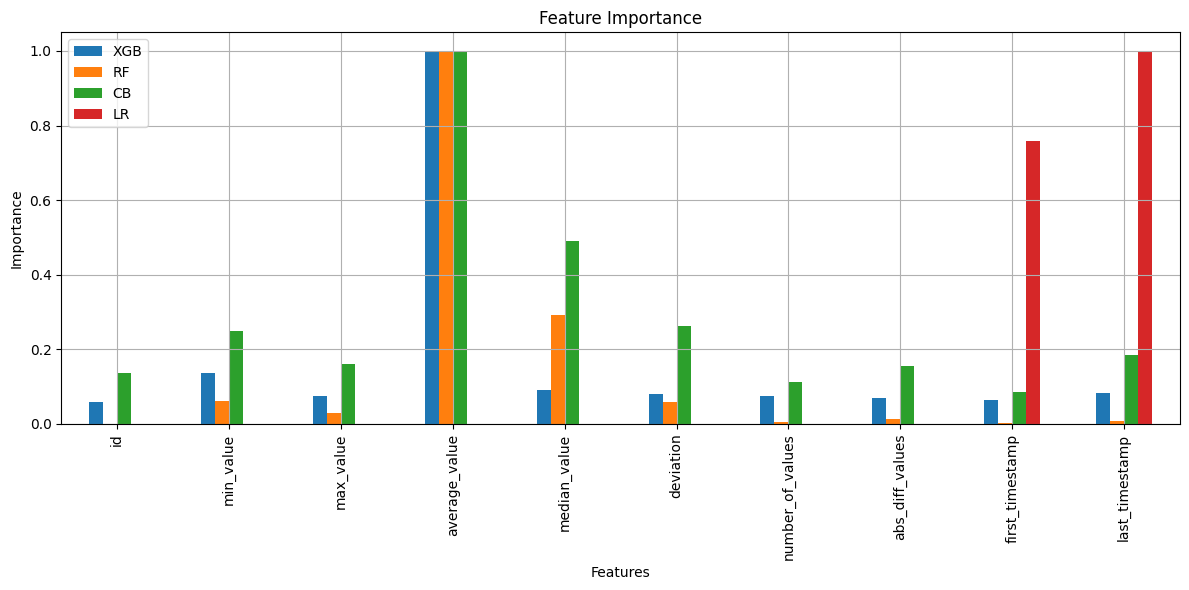

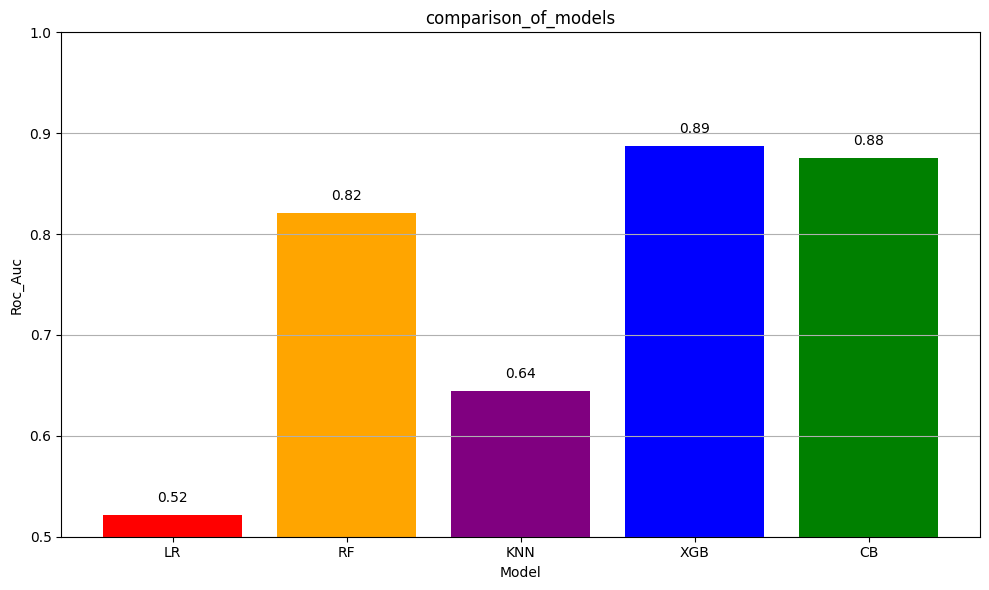

In [221]:
def normalize_importances(importances):
    return importances / np.max(importances)

roc_auc_scores = {
    'LR': roc_auc_lr,
    'RF': roc_auc_rf,
    'KNN': roc_auc_knn,
    'XGB': roc_auc_xgb,
    'CB': roc_auc_cb
}

feature_importances = {}

xgb_importance = xgb_model.feature_importances_
feature_importances['XGB'] = normalize_importances(xgb_importance)

rf_importance = rf_model.feature_importances_
feature_importances['RF'] = normalize_importances(rf_importance)

cb_importance = cb_model.feature_importances_
feature_importances['CB'] = normalize_importances(cb_importance)

lr_importance = np.abs(lr_model.coef_[0])
feature_importances['LR'] = normalize_importances(lr_importance)

feature_names = train.drop('label', axis=1).columns
importance_df = pd.DataFrame(feature_importances, index=feature_names)

plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar', figsize=(12, 6), title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color=['red', 'orange', 'purple', 'blue', 'green'])
plt.ylim(0.5, 1)
plt.title('comparison_of_models')
plt.xlabel('Model')
plt.ylabel('Roc_Auc')
plt.grid(axis='y')

for i, v in enumerate(roc_auc_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Сохраняем наш обработанный и готовый к прогнозированию датафрейм test и нашу обученную модель

In [222]:
import joblib

In [223]:
 test.to_csv('test_filtered.csv', index=False)

In [224]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']